In [1]:
pip install jedi==0.17.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("PCA.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
x=df.drop(['label'],axis=1)
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y=df['label']
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [10]:
x=sc.fit_transform(x)

In [11]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
from sklearn.decomposition import PCA
pca=PCA()
x_pca=pca.fit_transform(x)

In [13]:
x_pca

array([[-5.14047772e+00, -5.22644540e+00,  3.88700075e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 1.92923323e+01,  6.03299601e+00,  1.30814797e+00, ...,
        -9.56006251e-16,  1.59648796e-15, -2.98066339e-16],
       [-7.64450341e+00, -1.70581328e+00,  2.28932646e+00, ...,
        -5.08967682e-16,  4.89222952e-15, -4.01251883e-16],
       ...,
       [ 4.95391370e-01,  7.07627667e+00, -1.20896995e+01, ...,
        -2.91500251e-18, -9.10187708e-18, -6.64302779e-18],
       [ 2.30724011e+00, -4.34451279e+00,  6.99847802e-01, ...,
         1.50809686e-18,  7.25263318e-18, -1.30646474e-17],
       [-4.80767022e+00,  1.55912058e+00, -2.49793585e+00, ...,
         3.45606045e-17, -1.36084171e-18, -3.84695996e-18]])

In [14]:
x_pca.shape

(42000, 784)

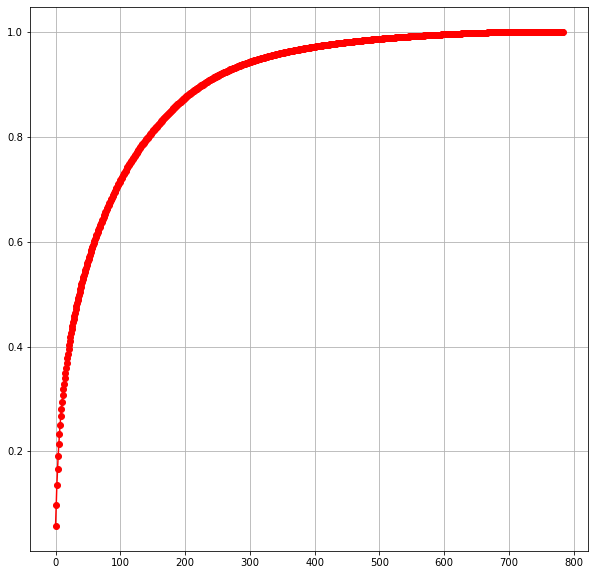

In [15]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.grid()

In [16]:
pca_final=PCA(.90)
x_new = pca_final.fit_transform(x)

In [17]:
x_new

array([[-5.14047772e+00, -5.22644540e+00,  3.88700075e+00, ...,
         1.44400661e-01, -1.00329461e-03,  2.84832250e-01],
       [ 1.92923323e+01,  6.03299601e+00,  1.30814797e+00, ...,
         1.69064879e-01,  2.68547194e-01,  2.60142902e-01],
       [-7.64450341e+00, -1.70581328e+00,  2.28932646e+00, ...,
         4.88280169e-02, -2.94036493e-01,  3.71738459e-02],
       ...,
       [ 4.95391370e-01,  7.07627667e+00, -1.20896995e+01, ...,
         1.68302411e+00,  1.54186077e-01, -4.54888297e-01],
       [ 2.30724011e+00, -4.34451279e+00,  6.99847802e-01, ...,
        -4.91346034e-02, -1.72255388e-01, -5.89164078e-01],
       [-4.80767022e+00,  1.55912058e+00, -2.49793585e+00, ...,
         5.56702353e-01,  5.43877873e-01,  7.66405760e-01]])

In [18]:
x_new.shape

(42000, 229)

In [19]:
y.shape

(42000,)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y,train_size=.8,random_state=0)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 229)
(8400, 229)
(33600,)
(8400,)


In [22]:
x_train

array([[ 7.13876717,  2.56217529,  0.16015317, ...,  0.81114512,
         0.24829796,  1.01854193],
       [11.11369775,  2.20724263, -1.21509517, ..., -0.39916452,
        -0.63969809, -0.74732665],
       [-2.25720774,  7.2146925 ,  0.31835439, ...,  0.12401193,
         0.68633207,  0.19014415],
       ...,
       [-4.96457193,  6.07382403, -3.23437421, ..., -0.53018076,
         0.08691319,  0.290769  ],
       [11.66680971, -6.21113827, -4.67815721, ..., -0.10735343,
         0.12491128, -0.33523772],
       [-3.78624515,  5.00303445, -2.96265407, ..., -0.20620646,
         0.09928475, -0.56034567]])

In [23]:
x = np.arange(1,10,1).reshape(-1,1)
dataframe = pd.DataFrame.from_records(x_train)

In [24]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,228
0,7.138767,2.562175,0.160153,9.430646,-0.925364,-0.379019,-2.506255,0.362001,-5.013579,5.267008,...,-1.562673,0.774945,0.816297,0.229786,-1.283663,0.262647,0.292329,0.811145,0.248298,1.018542
1,11.113698,2.207243,-1.215095,2.251412,-0.214260,1.745612,-5.717460,1.071908,-0.101259,6.105490,...,0.346433,0.533956,-0.748416,-0.239359,0.283936,-0.464574,0.519240,-0.399165,-0.639698,-0.747327
2,-2.257208,7.214693,0.318354,1.492661,-6.470803,2.719962,5.214867,-6.750662,1.717357,1.237396,...,-0.564591,0.302880,0.454400,0.504940,0.305088,0.781061,0.064457,0.124012,0.686332,0.190144
3,0.222691,3.153018,-4.617523,1.478094,3.110185,-3.361917,2.200979,-1.277492,-0.773239,5.290587,...,0.414809,0.104804,0.023687,-0.314120,0.189168,0.728423,-0.401932,0.012591,0.202130,-0.650917
4,3.801751,-6.157355,-1.821183,0.620896,-1.117426,5.658552,5.964936,-2.468271,-4.953916,1.728797,...,-0.744184,-0.683807,1.062128,0.618376,-0.313324,-1.223716,-0.160509,-0.478315,-0.006233,0.698049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,4.344420,1.828258,5.202599,7.613951,-7.122584,-2.141849,-3.197167,1.846523,1.327608,3.017842,...,1.783947,-0.980160,0.556236,1.360455,0.283762,-0.378486,-0.867549,1.267222,0.529035,0.231251
33596,-6.792308,0.529807,0.938245,1.292282,2.979988,-5.371486,0.503712,-0.267038,-0.544962,1.804190,...,0.678197,0.107905,-0.455367,-0.455313,0.075093,0.270086,-0.621880,0.526009,0.496133,-0.292265
33597,-4.964572,6.073824,-3.234374,-2.103300,-4.200672,-2.191610,-3.568903,-1.644889,-2.417581,0.496777,...,-0.154641,-0.266536,0.125286,0.216237,-0.003918,-1.448197,0.588943,-0.530181,0.086913,0.290769
33598,11.666810,-6.211138,-4.678157,-4.475997,-3.791791,-6.113936,-3.065603,2.899264,3.067095,-1.006293,...,-0.223657,0.389826,-0.422001,0.072468,0.852057,0.223464,0.371980,-0.107353,0.124911,-0.335238


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

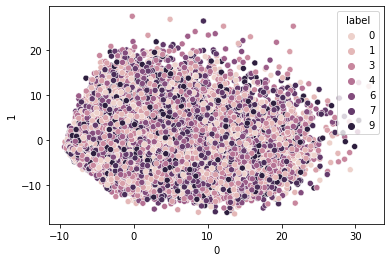

In [25]:
import seaborn as sns
sns.scatterplot(dataframe[0],dataframe[1],hue=y)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred=lr.predict(x_test)
y_pred

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

In [28]:
accuracy_score(y_test,y_pred)

0.9234523809523809

In [29]:
from sklearn.svm import SVC
svc=SVC()

In [30]:
svc.fit(x_train,y_train)

SVC()

In [31]:
y_pred=lr.predict(x_test)
y_pred

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred)

0.9234523809523809